In [1]:
import sys
import os

import sys
sys.path.insert(0, os.path.abspath('../src/'))
sys.path.insert(1, os.path.abspath('../src/rl/'))
sys.path.insert(2, os.path.abspath('../src/rl/agents/'))
sys.path.insert(4, os.path.abspath('../src/rl/agents/base/'))
sys.path.insert(5, os.path.abspath('../src/rl/environments/'))
sys.path.insert(6, os.path.abspath('../src/rl/environments/base'))
sys.path.insert(7, os.path.abspath('../src/rl/harnesses/'))
sys.path.insert(8, os.path.abspath('../src/rl/agents/ddqn/'))
sys.path.insert(9,os.path.abspath('../src/rl/common/'))

In [2]:
from agents.ddqn.QTrader import QTrader
from environments.GenerativeMarketEnv import GenerativeMarketEnv
from harnesses.QHarness import QHarness
from AgentArgs import AgentArgs

In [3]:
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 2 Assets

In [4]:
# create a generitive market that produces returns on two assets
μ = [1, 8]
Σ = [[0.2, 0], [0, 0.4]]
market = GenerativeMarketEnv(μ, Σ)

In [5]:
args = AgentArgs(
     num_assets = 2,
     increment = 0.1,
     ϵ_start=0.99,
     ϵ_end=0.01,
     ϵ_decay=0.99,
     q_network_hidden_size = 64,
     decay_start_time=100,
     start_ts = 100,
     γ=0.9,
     target_update='SOFT',
     buffer_size=1000,
     batch_size=64,
     lr=0.001,
     τ=0.01,
     evaluate=False,
     update_cadence=200,
     burn_in_period=100,
     dueling=False
 )

In [ ]:
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(10, 1000)

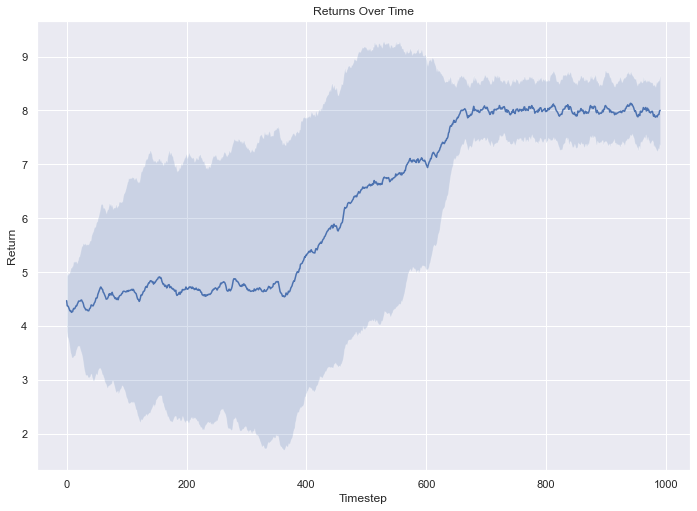

In [28]:
harness.plot_training_results(window=10)

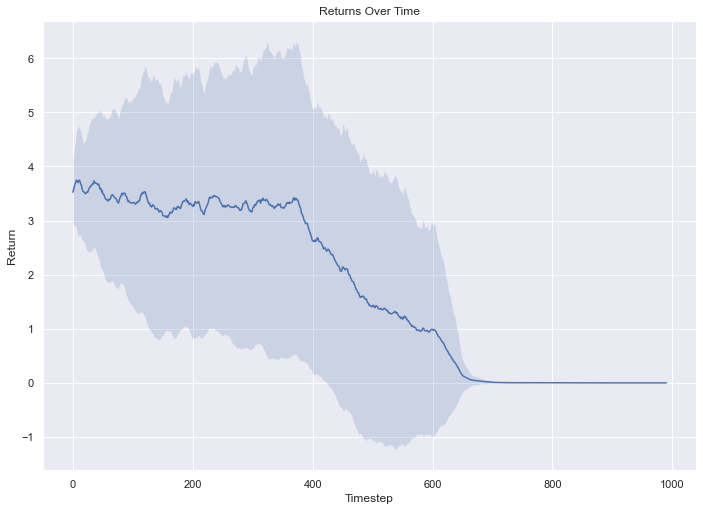

In [29]:
harness.plot_training_regret(window=10)

# 5 Assets

- Had to increase increment size in order for this to work

In [9]:
# create a generitive market that produces returns on two assets
μ = [1, 8, 5, 4, 2]
Σ = [[0.2, 0, 0, 0, 0], 
     [0, 0.4, 0, 0, 0], 
     [0, 0, 0.6, 0, 0],
     [0, 0, 0, 0.1, 0],
     [0, 0, 0, 0, 0.8]
    ]
market = GenerativeMarketEnv(μ, Σ)

In [10]:
args.num_assets = 5
args.increment = 0.25
args.lr = 0.005
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(4, 700)

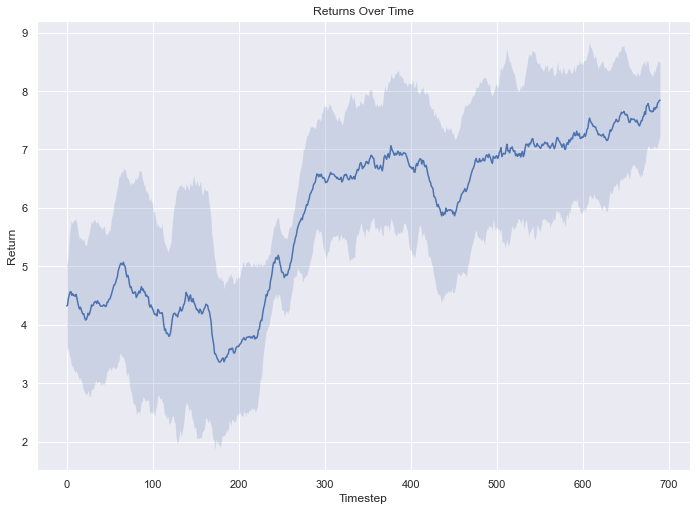

In [11]:
harness.plot_training_results(window=10)

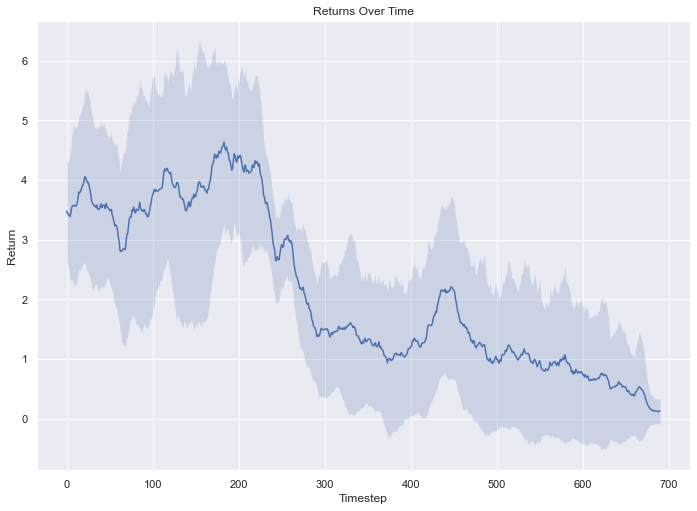

In [12]:
harness.plot_training_regret(window=10)

# 8 Assets: Real Data

In [16]:
import pandas as pd
import numpy as np

In [17]:
μ = np.load('./8_assets_mu.pkl.npy')
Σ = np.load('./8_assets_sigma.pkl.npy')

market = GenerativeMarketEnv(μ, Σ)

In [18]:
Σ

array([[ 6.24699099e-04,  3.72980006e-04,  4.46147864e-04,
         1.89553366e-04,  3.28591715e-04,  1.83458903e-04,
         1.53457321e-04,  6.01252991e-04],
       [ 3.72980006e-04,  4.92026566e-04,  3.76444279e-04,
         1.82939645e-05,  2.88701015e-04,  1.42408637e-05,
        -1.51186159e-05,  5.09335076e-04],
       [ 4.46147864e-04,  3.76444279e-04,  6.50192725e-04,
         2.26992278e-04,  3.93644854e-04,  1.57752177e-04,
         1.51990596e-04,  4.84198032e-04],
       [ 1.89553366e-04,  1.82939645e-05,  2.26992278e-04,
         1.29302384e-03,  2.76979310e-04,  6.66105617e-04,
         7.45994690e-04,  4.55367573e-04],
       [ 3.28591715e-04,  2.88701015e-04,  3.93644854e-04,
         2.76979310e-04,  4.48175192e-04,  2.22011499e-04,
         2.42412613e-04,  4.20115821e-04],
       [ 1.83458903e-04,  1.42408637e-05,  1.57752177e-04,
         6.66105617e-04,  2.22011499e-04,  7.90847329e-04,
         6.56271806e-04,  2.71056654e-04],
       [ 1.53457321e-04, -1.511861

In [19]:
μ

array([0.00320791, 0.0026484 , 0.0029266 , 0.00464147, 0.00283992,
       0.0025935 , 0.00190677, 0.00946511])

In [20]:
args = AgentArgs(
     num_assets = 2,
     increment = 0.5,
     ϵ_start=0.99,
     ϵ_end=0.1,
     ϵ_decay=0.99,
     q_network_hidden_size = 64,
     decay_start_time=50,
     start_ts = 500,
     γ=0.9,
     target_update='SOFT',
     buffer_size=1000,
     batch_size=64,
     lr=0.001,
     τ=0.01,
     evaluate=False,
     update_cadence=200,
     burn_in_period=50,
     dueling=True
 )

In [25]:
args.num_assets = 8
args.increment = 0.1
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(4, 1000)

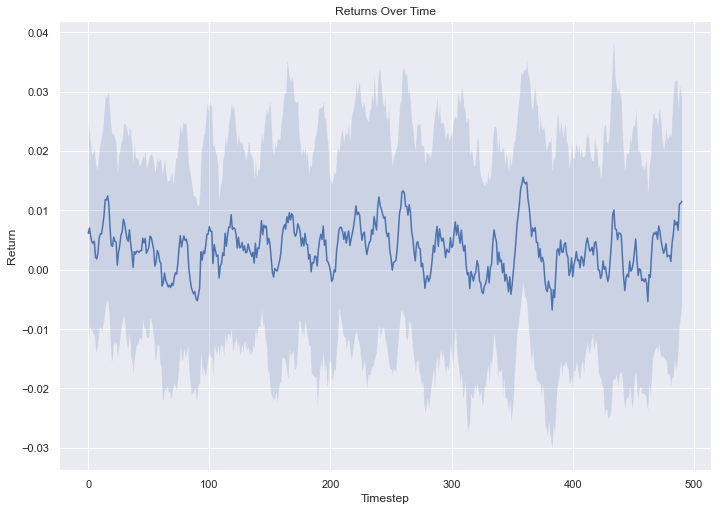

In [23]:
harness.plot_training_results(window=10)

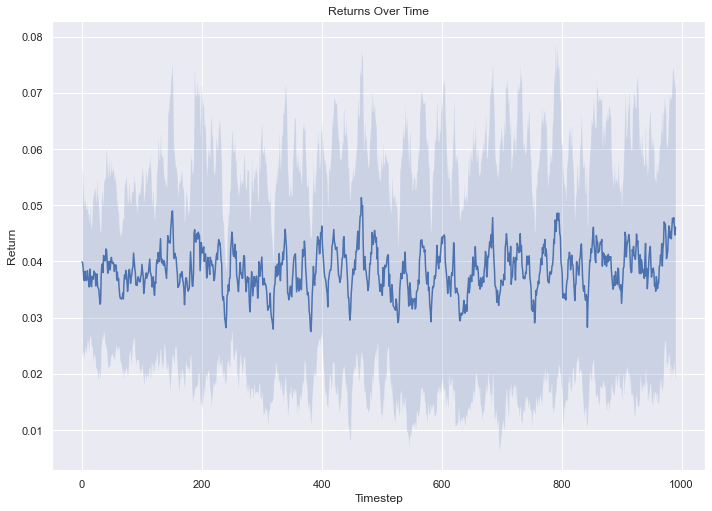

In [26]:
harness.plot_training_regret(window=10)